In [6]:
import pandas as pd
df=pd.read_json("tweet_json.txt",lines=True)#用read_json读每一行的数据,
#df_2=pd.read_csv("tweet_json.txt",delimiter="\t")
df_3=pd.read_csv("twitter-archive-enhanced.csv")#read_csv读
df_4=pd.read_csv("image-predictions.tsv",delimiter="\t")#指定分隔符为“\t”
#df_2.head()
#

In [7]:
df.columns.values.tolist()#列出tweet_json的所有列,并以list保存()

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

In [18]:
df_3.columns.values.tolist()#同样列出所有列，并保存

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [31]:
df=df.rename(columns={"id":"tweet_id"})#修改tweet_json里面的id列，改成tweet_id，为了后面的数据合并

In [32]:
df_clean=pd.DataFrame(df,columns=["tweet_id","full_text", 'retweet_count','favorite_count'])#选取出指定列

In [33]:
df_clean#指定列信息查看

,tweet_id,full_text,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8842,39492
1,892177421306343426,This is Tilly. She's just checking pup on you....,6480,33786
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4301,25445
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8925,42863
4,891327558926688256,This is Franklin. He would like you to stop ca...,9721,41016
...,...,...,...,...
2347,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,41,111
2348,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,147,309
2349,666033412701032449,Here is a very happy pup. Big fan of well-main...,47,128
2350,666029285002620928,This is a western brown Mitsubishi terrier. Up...,48,132


In [23]:
df_3_clean=pd.DataFrame(df_3,columns=['tweet_id','rating_numerator'])#选取出tweet_id,rating_numerator列选出
df_3_clean["rating_numerator"]=df_3_clean["rating_numerator"]/10#将两列的评分换成一列，用rating_numerator代替两列的信息
df_3_clean

,tweet_id,rating_numerator
0,892420643555336193,1.3
1,892177421306343426,1.3
2,891815181378084864,1.2
3,891689557279858688,1.3
4,891327558926688256,1.2
...,...,...
2351,666049248165822465,0.5
2352,666044226329800704,0.6
2353,666033412701032449,0.9
2354,666029285002620928,0.7


In [26]:
df_4

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [35]:
data=pd.merge(df_clean,df_3_clean,on="tweet_id")#把tweet_json.txt和twitter-archive-enhanced.csv按照tweet_id合并
data=data.rename(columns={"rating_numerator":"rating"})#修改rating_numerator为rating列

In [36]:
data#清洗后数据展示

,tweet_id,full_text,retweet_count,favorite_count,rating
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,8842,39492,1.3
1,892177421306343426,This is Tilly. She's just checking pup on you....,6480,33786,1.3
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,4301,25445,1.2
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,8925,42863,1.3
4,891327558926688256,This is Franklin. He would like you to stop ca...,9721,41016,1.2
...,...,...,...,...,...
2347,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,41,111,0.5
2348,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,147,309,0.6
2349,666033412701032449,Here is a very happy pup. Big fan of well-main...,47,128,0.9
2350,666029285002620928,This is a western brown Mitsubishi terrier. Up...,48,132,0.7


In [2]:
import numpy as np
np.arange(0,9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [3]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [4]:
np.random.random([3,3,3])

array([[[0.88347522, 0.87768516, 0.3139701 ],
        [0.77927678, 0.6750369 , 0.10148195],
        [0.05294109, 0.08928133, 0.9153871 ]],

       [[0.30737917, 0.99202196, 0.10119351],
        [0.70460157, 0.03334927, 0.34575212],
        [0.11553394, 0.86211347, 0.97805174]],

       [[0.75928454, 0.670999  , 0.50898857],
        [0.49238949, 0.18815407, 0.29542035],
        [0.08429301, 0.65866841, 0.60049488]]])

In [14]:
np.mat('1 2 3;4 5 6; 7 8 9')

[matrix([[1, 2, 3]]), matrix([[4, 5, 6]]), matrix([[7, 8, 9]])]

In [46]:
arr=np.arange(2,26).reshape(3,2,4)
arr

array([[[ 2,  3,  4,  5],
        [ 6,  7,  8,  9]],

       [[10, 11, 12, 13],
        [14, 15, 16, 17]],

       [[18, 19, 20, 21],
        [22, 23, 24, 25]]])

In [52]:
arr.transpose((1,0,3))

AxisError: axis 3 is out of bounds for array of dimension 3

In [36]:
#L=[i for i in range(1,8)]
#W=[i for i in range(2,9)]
L=np.arange(1,8)
W=np.arange(2,9)


In [34]:
np.frompyfunc(L*W,7,7)

TypeError: can't multiply sequence by non-int of type 'list'

In [38]:
def chengfa(a,b):
    return a*b
func=np.frompyfunc(chengfa,2,1)
result=func(L,W)

In [56]:
import pandas as pd

C:\Users\HASEE\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\HASEE\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
pd.DataFrame(,columns=["证券代码","证券简称","最高价","涨跌幅%"])

In [58]:
df=pd.DataFrame.from_dict(dict([('证券代码', ["01","02","03","04"]), ('证券简称', ["1","1","1","1"]),("最高价",[7.00,4.23,10.56,30.23]),("涨跌幅%",[9.03,7.25,6.48,5.02])]))

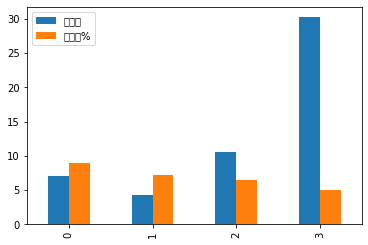

In [61]:
%matplotlib inline
df.plot(kind="bar")
